# Task 2: Drug Classification

1. Download the Drug dataset on Moodle. This dataset, in csv format, contains features that are numerical, categorical and ordinal as well as one of 5 classes to predict: DrugA, DrugB, DrugC, DrugX, or DrugY.

In [1]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
import sklearn

2. Load the dataset in Python (you can use pandas.read csv).

In [2]:
df = pd.read_csv('drug200.csv')

3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.

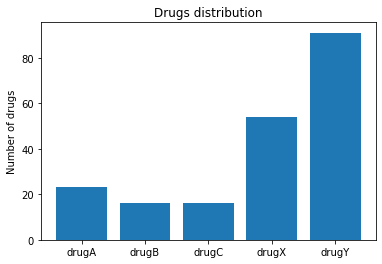

In [3]:
drugs = sorted(df['Drug'].unique())
drugA = df[df['Drug'] == 'drugA']
drugB = df[df['Drug'] == 'drugB']
drugC = df[df['Drug'] == 'drugC']
drugX = df[df['Drug'] == 'drugX']
drugY = df[df['Drug'] == 'drugY']

plt.bar(drugs, [len(drugA), len(drugB), len(drugC), len(drugX), len(drugY)])
plt.ylabel('Number of drugs')
plt.title('Drugs distribution')
plt.savefig('drug-distribution.pdf')
plt.show()

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas.Categorical to do this.

In [4]:
parsed_df = pd.get_dummies(df, prefix=['Sex'], columns=['Sex'])\
                .rename(columns={"Sex_F": "Female", "Sex_M": "Male"})
parsed_df['BP'] = pd.Categorical(parsed_df['BP'], ordered=True, categories=['LOW', 'NORMAL', 'HIGH']).codes
parsed_df['Cholesterol'] = pd.Categorical(parsed_df['Cholesterol'], ordered=True, categories=['NORMAL', 'HIGH']).codes
parsed_df

,Age,BP,Cholesterol,Na_to_K,Drug,Female,Male
0,23,2,1,25.355,drugY,1,0
1,47,0,1,13.093,drugC,0,1
2,47,0,1,10.114,drugC,0,1
3,28,1,1,7.798,drugX,1,0
4,61,0,1,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,0,1,11.567,drugC,1,0
196,16,0,1,12.006,drugC,0,1
197,52,1,1,9.894,drugX,0,1
198,23,1,0,14.020,drugX,0,1


5. Split the dataset using train test split using the default parameter values.

In [14]:
arr_no_drug = parsed_df.drop('Drug', axis=1).to_numpy()
arr_drug = parsed_df['Drug'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(arr_no_drug, arr_drug)


x_train

array([[58.   ,  0.   ,  1.   , 38.247,  1.   ,  0.   ],
       [23.   ,  1.   ,  1.   , 16.85 ,  0.   ,  1.   ],
       [53.   ,  0.   ,  1.   , 22.963,  0.   ,  1.   ],
       [32.   ,  0.   ,  1.   ,  9.712,  1.   ,  0.   ],
       [25.   ,  1.   ,  1.   , 19.011,  0.   ,  1.   ],
       [28.   ,  0.   ,  1.   , 19.796,  1.   ,  0.   ],
       [22.   ,  2.   ,  0.   , 22.818,  1.   ,  0.   ],
       [37.   ,  2.   ,  1.   , 13.091,  1.   ,  0.   ],
       [30.   ,  1.   ,  1.   , 10.443,  1.   ,  0.   ],
       [60.   ,  1.   ,  0.   , 10.091,  0.   ,  1.   ],
       [58.   ,  2.   ,  1.   , 19.416,  1.   ,  0.   ],
       [70.   ,  2.   ,  1.   , 13.967,  0.   ,  1.   ],
       [50.   ,  1.   ,  0.   , 17.211,  1.   ,  0.   ],
       [18.   ,  2.   ,  0.   , 24.276,  1.   ,  0.   ],
       [73.   ,  1.   ,  1.   , 19.221,  1.   ,  0.   ],
       [15.   ,  1.   ,  1.   ,  9.084,  0.   ,  1.   ],
       [49.   ,  0.   ,  1.   , 10.537,  0.   ,  1.   ],
       [24.   ,  1.   ,  1.   ,

6. Run 6 different classifiers:

(a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.

In [6]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB().fit(x_train, y_train)

(b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [7]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier().fit(x_train, y_train)

(c) Top-DT: a better performing Decision Tree found using (GridSearchCV). The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function that you have determined in step (3) above. The hyper-parameters that you will experiment with are:
- criterion: gini or entropy
- max depth : 2 different values of your choice
- min samples split: 3 different values of your choice

In [8]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [69, 420],
    'min_samples_split': [2, 5, 12]
}
GSCV = GridSearchCV(DecisionTreeClassifier(), parameters).fit(x_train, y_train)

(d) PER: a Perceptron (linear model.Perceptron), with default parameter values.

In [9]:
from sklearn.linear_model import Perceptron
PERCEPTRON = Perceptron().fit(x_train, y_train)

(e) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of
100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values
for the rest of the parameters.

In [16]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd' ).fit(x_train, y_train)

/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following parameter values:
- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers with 10 + 10 + 10
- solver: Adam and stochastic gradient descent

In [11]:
parameters = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
GSCV = GridSearchCV(MLPClassifier(), parameters).fit(x_train, y_train)

/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/phong/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

7. For each of the 6 classifier above, append the following information in a file called drugs-performance.txt: (to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked in your output file, using the headings (a), (b) . . .) 

(a) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model (e.g. the
model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
display the best hyperparameters found by the gridsearch.